 # Reinforcement Learning - Assignment 1
 ## Arpit Parihar
 ## 04/19/2021
 ****

 ## Part 1 - Bond rating transitions
 Consider the following transition probability matrix for corporate bond credit ratings:
 $$P = \begin{bmatrix} 90.81 & 8.33 & 0.68 & 0.06 & 0.08 & 0.02 & 0.01 & 0.01 \\ 0.70 & 90.65 & 7.79 & 0.64 & 0.06 & 0.13 & 0.02 & 0.01 \\ 0.09 & 2.27 & 91.05 & 5.52 & 0.74 & 0.26 & 0.01 & 0.06 \\0.02 & 0.33 & 5.95 & 85.93 & 5.30 & 1.17 & 1.12 & 0.18 \\0.03 & 0.14 & 0.67 & 7.73 & 80.53 & 8.84 & 1.00 & 1.06 \\0.01 & 0.11 & 0.24 & 0.43 & 6.48 & 83.46 & 4.07 & 5.20 \\0.21 & 0.00 & 0.22 & 1.30 & 2.38 & 11.24 & 64.86 & 19.79 \\0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 100.00 \end{bmatrix}$$
 The ratings are AAA, AA, A, BBB, BB, B, CCC, D and represent states 1-8 in the Markov chain.

 **1\) Plot the n-step ahead probabilities, $P_{i,j}(n)$ for $n = 1,2,...,100$ for every $i$ and $j$ in $\{AAA, AA, A, BBB, BB, B, CCC, D\}$. Make sure to properly label each state based on the rating labels.**

In [1]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import math
from matplotlib.ticker import FormatStrFormatter
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_formats = ['png']

In [2]:
# Creating transition probability matrix
P = np.array([
    [90.81, 8.33, 0.68, 0.06, 0.08, 0.02, 0.01, 0.01],
    [0.70, 90.65, 7.79, 0.64, 0.06, 0.13, 0.02, 0.01],
    [0.09, 2.27, 91.05, 5.52, 0.74, 0.26, 0.01, 0.06],
    [0.02, 0.33, 5.95, 85.93, 5.30, 1.17, 1.12, 0.18],
    [0.03, 0.14, 0.67, 7.73, 80.53, 8.84, 1.00, 1.06],
    [0.01, 0.11, 0.24, 0.43, 6.48, 83.46, 4.07, 5.20],
    [0.21, 0.00, 0.22, 1.30, 2.38, 11.24, 64.86, 19.79],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 100.00]],
    dtype=float)
P = P / np.sum(P, axis=1)
labels = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', 'D']
P = pd.DataFrame(P, index=labels, columns=labels)
P

,AAA,AA,A,BBB,BB,B,CCC,D
AAA,0.9081,0.0833,0.0068,0.0006,0.0008,0.0002,0.0001,0.0001
AA,0.0070,0.9065,0.0779,0.0064,0.0006,0.0013,0.0002,0.0001
A,0.0009,0.0227,0.9105,0.0552,0.0074,0.0026,0.0001,0.0006
BBB,0.0002,0.0033,0.0595,0.8593,0.0530,0.0117,0.0112,0.0018
BB,0.0003,0.0014,0.0067,0.0773,0.8053,0.0884,0.0100,0.0106
B,0.0001,0.0011,0.0024,0.0043,0.0648,0.8346,0.0407,0.0520
CCC,0.0021,0.0000,0.0022,0.0130,0.0238,0.1124,0.6486,0.1979
D,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


In [3]:
T = 100
n = len(P)
P_cumulative = np.zeros((T, n, n), dtype=np.float64)
P_cumulative[0] = P
for t in range(T - 1):
    P_cumulative[t + 1] = np.matmul(P_cumulative[t], P)

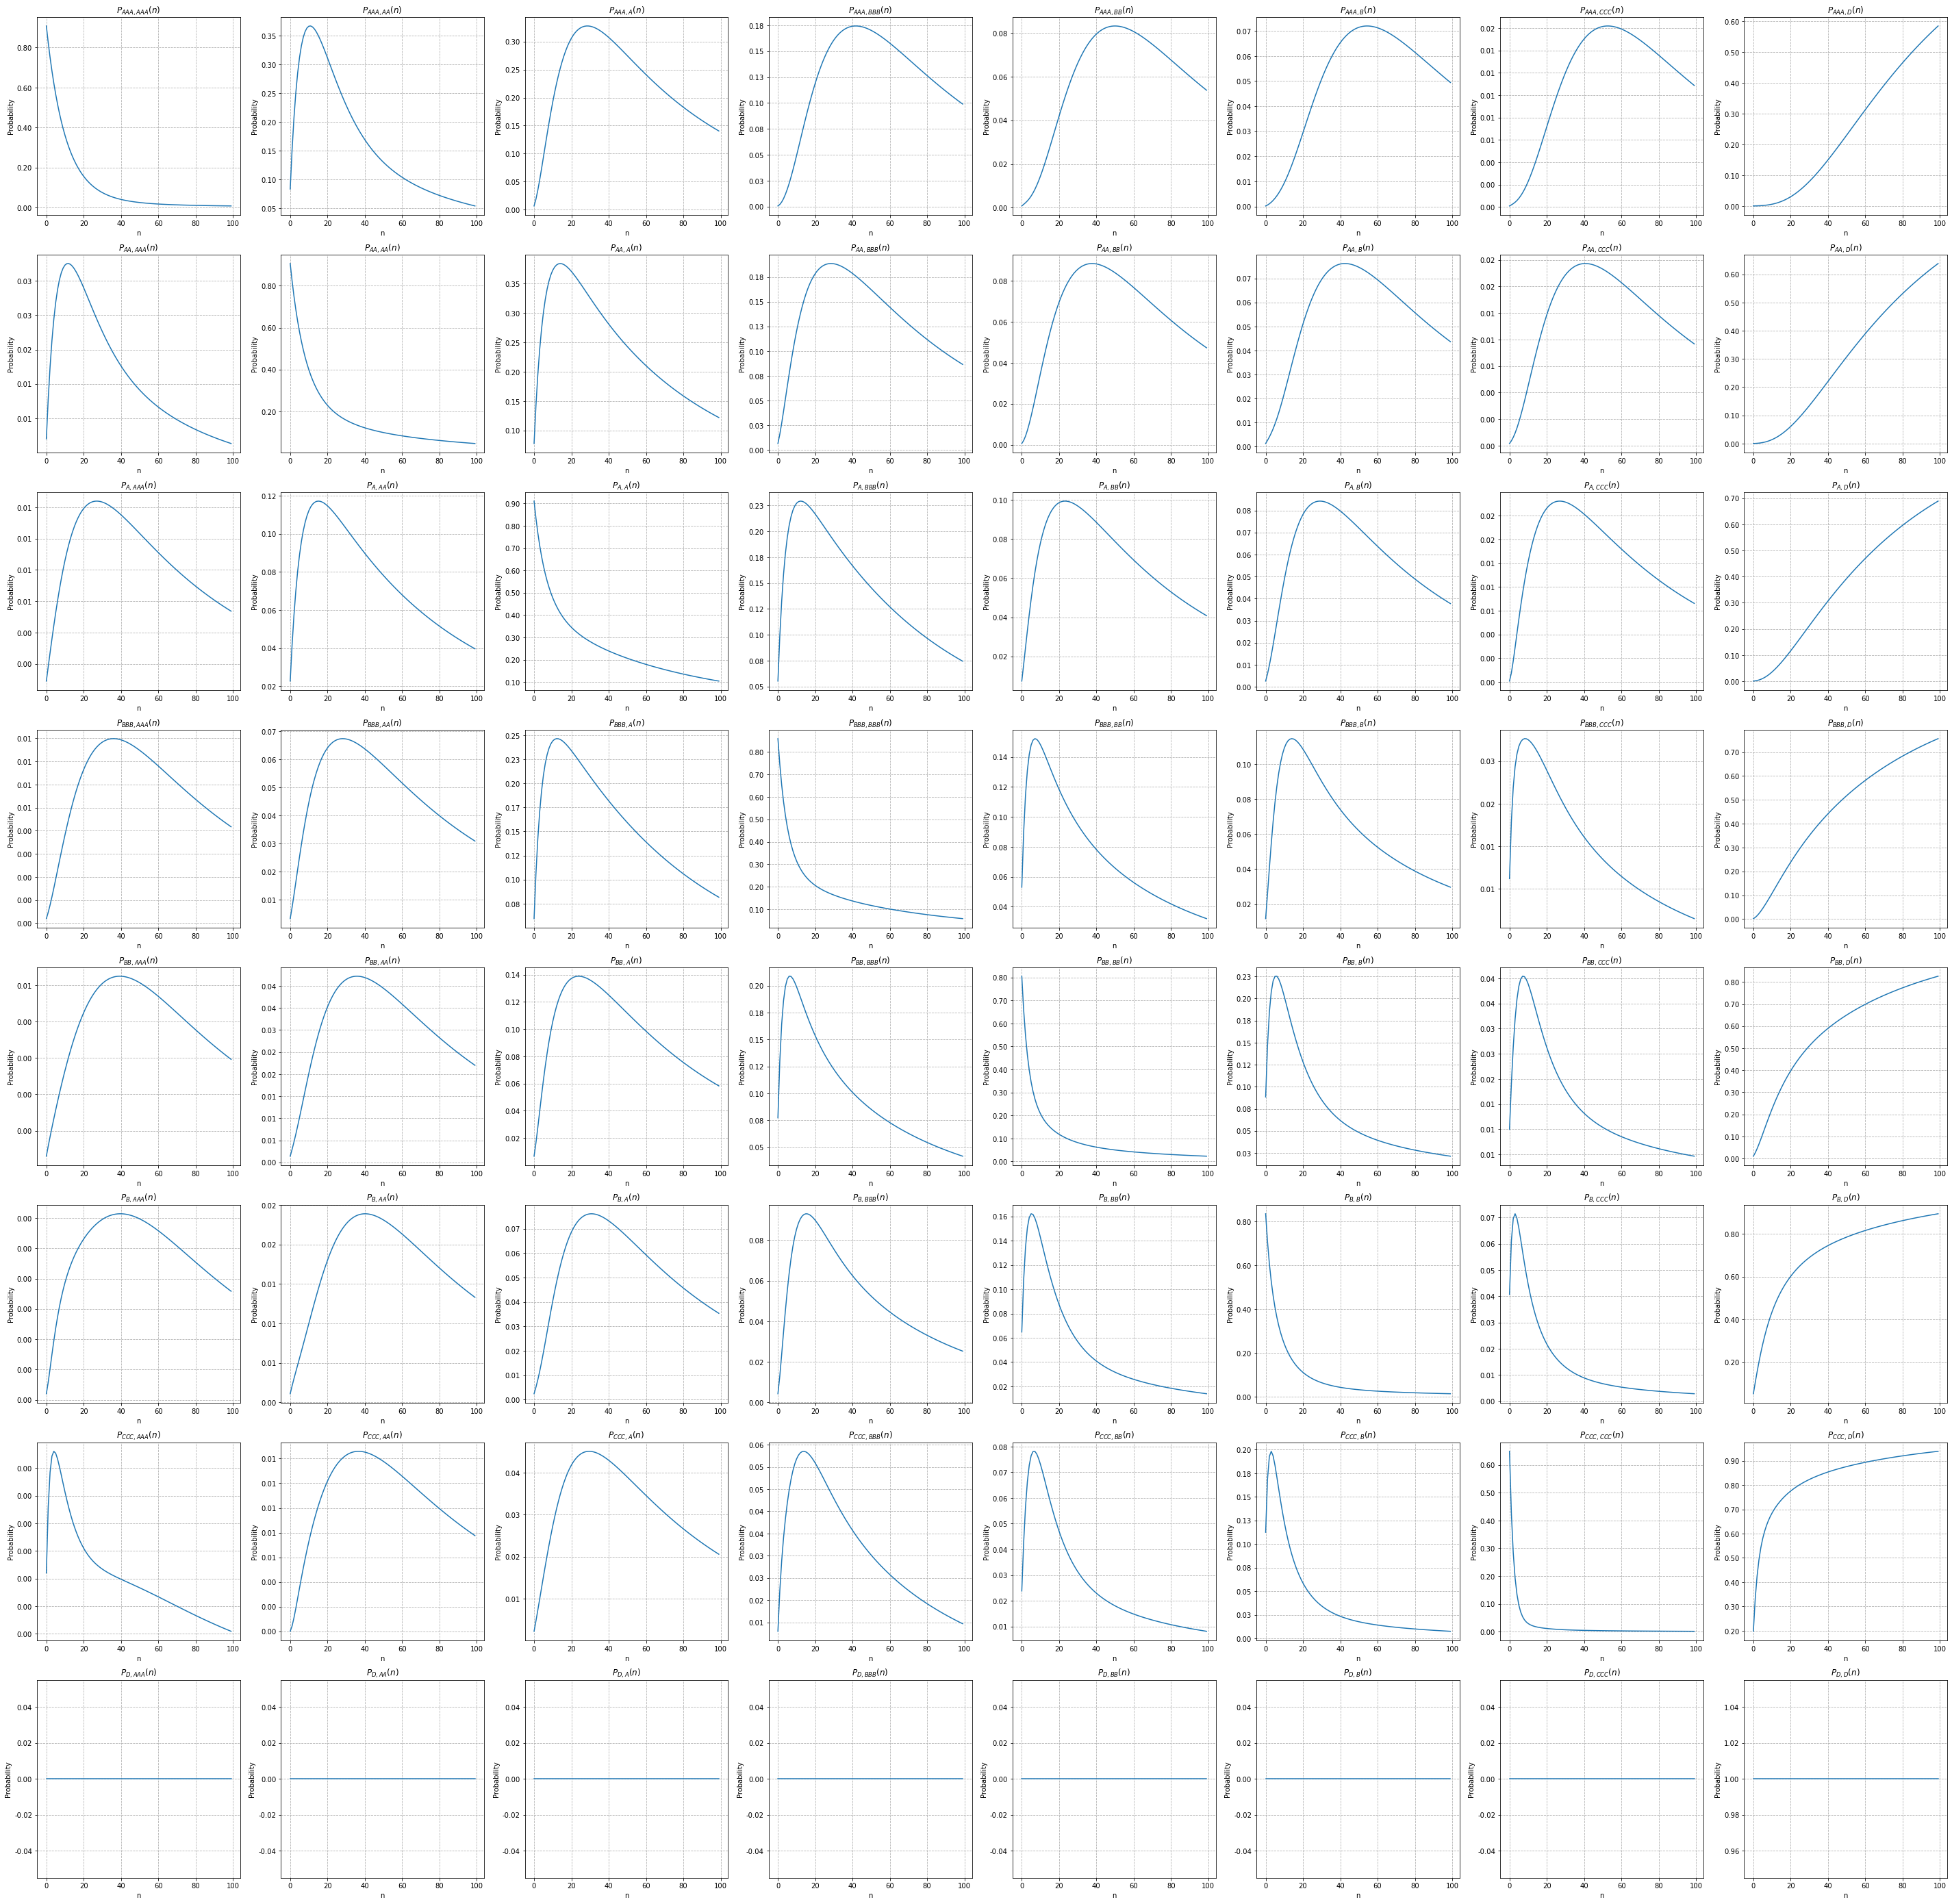

In [4]:
fig, axs = plt.subplots(len(P), len(P), figsize=(50, 50));
for i in range(len(P)):
    for j in range(len(P)):
        axs[i, j].plot(P_cumulative[:, i, j]);
        axs[i, j].set_title(f'$P_{{{labels[i]}, {labels[j]}}}(n)$')
        axs[i, j].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        axs[i, j].set(xlabel='n', ylabel='Probability')
        axs[i, j].grid(linestyle='dashed')

 **2\) Group all states into classes. Report the classes and the total number of classes. Explain your answer.**

 The states can be grouped into 2 classes:
 - $\{AAA, AA, A, BBB, BB, B, CCC\}$
 - $\{D\}$

 All the states communicate with each other except for D, which is an absorbing state. State $CCC$ doesn't communicate with state $AA$ in a single step, but does so in multiple steps.

 **3\) What is the periodicity of the transition probability matrix? Explain your answer.**

 All the states have access to themselves in a single step, so the periodicity of the transition matrix is $d = 1$. In other words, the chain is aperiodic.

 **4) Construct a 100-step simulation for a bond rating assuming an initial $AAA$ rating and the above transition matrix.**

In [5]:
# Function to simulate markov chain from uniform[0,1]


def MC_sim(K, S, p, P, seed=0):
    np.random.seed(seed)
    U = np.random.uniform(low=0.0, high=1.0, size=K)
    Y = np.zeros(K, dtype=int)
    p = pd.Series(p, index=P.index)
    P_sim = pd.DataFrame(np.zeros_like(P), index=P.index, columns=P.columns)
    k = 0
    for u in U:
        # simulation of initial values
        if k == 0:
            i = S[p.cumsum().ge(u)][0]
            j = S[p.cumsum().ge(u)][0]
            Y[k] = i
        # simulation of the transitions
        else:
            j = S[P.cumsum(axis=1).iloc[i - 1, :].ge(u)][0]
            Y[k] = j
        k += 1
        P_sim.iloc[i - 1, j - 1] += 1
        i = j
    return Y, P_sim


K = 100
S = pd.Series(range(1, 9), index=P.index)
p = [1, 0, 0, 0, 0, 0, 0, 0]
Y, _ = MC_sim(K, S, p, P, 7)

 - Plot the sequence of transitions as a step function of time.

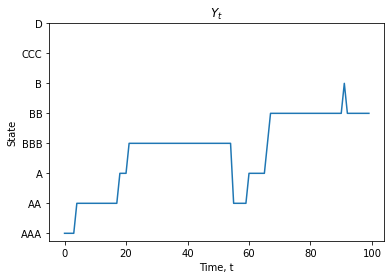

In [6]:
plt.plot(Y);
plt.yticks(S.values, S.index);
plt.xlabel('Time, t');
plt.ylabel('State');
plt.title('$Y_{t}$');

 - Report the likehood of each transition and the likelihood of the entire simulated sequence.

In [7]:
# Load simulated matrix from disk if it exists, create it if it doesn't
try:
    P_sim_total = joblib.load('sim_probs.pkl')
except:
    # Running 10000 simulations with 100 steps
    P_sim_total = pd.DataFrame(np.zeros_like(
        P), index=P.index, columns=P.columns)
    for i in range(10000):
        _, P_sim = MC_sim(K, S, p, P, None)
        P_sim_total = P_sim_total + P_sim
    joblib.dump(P_sim_total, 'sim_probs.pkl');
P_sim_probs = np.round(P_sim_total / np.sum(P_sim_total, axis=1), 4)
print(f'Transition likelihoods (simulated): \n\n{P_sim_probs}')
print(f'\n\nTransition likelihoods (actual): \n\n{P}\n')

Transition likelihoods (simulated): 

        AAA      AA       A     BBB      BB       B     CCC       D
AAA  0.9151  0.0627  0.0038  0.0005  0.0018  0.0007  0.0009  0.0000
AA   0.0084  0.9057  0.0570  0.0091  0.0018  0.0044  0.0028  0.0001
A    0.0014  0.0318  0.9105  0.1009  0.0277  0.0118  0.0018  0.0006
BBB  0.0002  0.0024  0.0327  0.8579  0.1121  0.0289  0.1295  0.0011
BB   0.0001  0.0004  0.0016  0.0367  0.8078  0.1028  0.0517  0.0025
B    0.0001  0.0004  0.0005  0.0016  0.0537  0.8359  0.1776  0.0108
CCC  0.0002  0.0000  0.0001  0.0013  0.0048  0.0255  0.6466  0.0093
D    0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  1.0000


Transition likelihoods (actual): 

        AAA      AA       A     BBB      BB       B     CCC       D
AAA  0.9081  0.0833  0.0068  0.0006  0.0008  0.0002  0.0001  0.0001
AA   0.0070  0.9065  0.0779  0.0064  0.0006  0.0013  0.0002  0.0001
A    0.0009  0.0227  0.9105  0.0552  0.0074  0.0026  0.0001  0.0006
BBB  0.0002  0.0033  0.0595  0.8593  0.05

In [8]:
# Calculating total likelihood of the simulated sequence
ll_total = 0
for i in range(len(Y) - 1):
    ll_total += math.log(P_sim_probs.iloc[Y[i] - 1, Y[i + 1] - 1])
print(f'Total likelihood = {math.e**ll_total}\n')

Total likelihood = 2.3944673039302478e-18



 - Is this Markov chain stationary? Please provide detailed reasoning.

 No, this chain is not stationary, as initial state distribution changes when multiplied with the transition matrix

In [9]:
print(f'p = {p}\np*P = {[round(x, 4) for x in np.matmul(p, np.array(P))]}\n')

p = [1, 0, 0, 0, 0, 0, 0, 0]
p*P = [0.9081, 0.0833, 0.0068, 0.0006, 0.0008, 0.0002, 0.0001, 0.0001]



 Initial state distribution to make the chain a stationary chain can be obtained as below:

In [10]:
eig_val_1_index = np.where(np.linalg.eig(P.T)[0] == 1)[
    0][0]  # index of eigenvalue = 1
eig_vec = np.linalg.eig(P.T)[1]  # all eigenvectors
init_dist = []
for ev in eig_vec:
    init_dist.append(ev[eig_val_1_index] / np.sum(eig_vec[:, eig_val_1_index]))
print(f'Initial state distribution for stationarity:\n{init_dist}\n')

Initial state distribution for stationarity:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]



 - Is this Markov chain time homogeneous? Please provide detailed reasoning.

 Yes, the Markov chain is time homogenous, as the transition matrix does not depend on time. Also, the probability of going from state $i$ at time $t$ to state $j$ at time $t+1$ remains the same ($P_{i,j}$), no matter what happened before, i.e.
 $$Prob[Y_{t+1}=j | Y_{t}=i] = P_{i,j}$$

 **5\) Compute the expected number of transitions between any pair of transient states before transitioning to the absorbing state.**

 The expected number of transitions before reaching absorbing state from state $i$ to state $j$, can be obtained by solving the system of equations:
 $$Z = I_{N_{k}\times N_{k}} + H_{N_{k}\times N_{k}}Z$$
 Which is,
 $$Z = (I_{N_{k}\times N_{k}} - H_{N_{k}\times N_{k}})^{-1}$$

In [11]:
H = P.drop(index='D', columns='D')
Z = pd.DataFrame(np.linalg.inv(np.identity(
    H.shape[0]) - H), index=H.index, columns=H.columns)

 **6\) Compute the probability that a state $j$ will ever be reached from state $i$ (for all $i$ and $j$)**

In [12]:
Q = pd.DataFrame(np.zeros_like(H), index=H.index, columns=H.columns)
for i in range(H.shape[0]):
    for j in range(H.shape[1]):
        Q.iloc[i, j] = (H.iloc[i, j] - 0) / H.iloc[j, j]
print(f'Probabilities of ever reaching state j from state i: \n\n{Q}')

Probabilities of ever reaching state j from state i: 

          AAA        AA         A       BBB        BB         B       CCC
AAA  1.000000  0.091892  0.007468  0.000698  0.000993  0.000240  0.000154
AA   0.007708  1.000000  0.085557  0.007448  0.000745  0.001558  0.000308
A    0.000991  0.025041  1.000000  0.064238  0.009189  0.003115  0.000154
BBB  0.000220  0.003640  0.065349  1.000000  0.065814  0.014019  0.017268
BB   0.000330  0.001544  0.007359  0.089957  1.000000  0.105919  0.015418
B    0.000110  0.001213  0.002636  0.005004  0.080467  1.000000  0.062751
CCC  0.002313  0.000000  0.002416  0.015129  0.029554  0.134675  1.000000


 **7\) Compute the probability that a bond will reach:**

In [13]:


def bond_steps(P, T, end):
    N = P.shape[0]
    f = np.zeros((T, N, N), dtype=np.float64)
    Pbar = np.zeros((N, N, N), dtype=np.float64)

    for i in range(0, N):
        for j in range(0, N):
            for k in range(0, N):
                if k != i:
                    Pbar[i, j, k] = P.iloc[j, k]
                else:
                    Pbar[i, j, k] = 0

    for j in range(0, N):
        for t in range(0, T):
            if t == 0:
                f[t, :, j] = P.iloc[:, j]
            else:
                f[t, :, j] = np.matmul(Pbar[j, :, :], f[t - 1, :, j])

    f_final = np.zeros_like(f[0, :, 0])
    for t in range(T):
        f_final += f[t, :, end]

    return f_final



 - $AAA$ rating within $5$ periods given a current rating of $AAA, AA, A, BBB, BB, B, CCC$

In [14]:
f_AAA = pd.DataFrame(bond_steps(P, 5, P.columns.get_loc(
    'AAA')), index=P.index, columns=['Probability'])
print(f'Probabilities of reaching AAA rating: \n\n{f_AAA}')

Probabilities of reaching AAA rating: 

     Probability
AAA     0.910192
AA      0.029763
A       0.005267
BBB     0.001754
BB      0.001586
B       0.001124
CCC     0.005535
D       0.000000


 - $CCC$ rating within $5$ periods given a current rating of $AAA, AA, A, BBB, BB, B, CCC$

In [15]:
f_CCC = pd.DataFrame(bond_steps(P, 5, P.columns.get_loc(
    'CCC')), index=P.index, columns=['Probability'])
print(f'Probabilities of reaching CCC rating: \n\n{f_CCC}')

Probabilities of reaching CCC rating: 

     Probability
AAA     0.000945
AA      0.002568
A       0.007545
BBB     0.051917
BB      0.066085
B       0.153521
CCC     0.665099
D       0.000000


 - Use your intuition and guess whether $f_{i,i}<1$ or $f_{i,i}=1$ for each rating?

 For all states except $D$, $f_{i,i}<1$, as $D$ is an absorbing state, and eventually, each state will be visited for the last time. For $D$, $f_{i,i}=1$ as once $D$ is hit, the chain stays there forever.